In [1]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

df = pd.read_csv('SOCASTEE_02110725.csv')
df['Gage height, feet'] = df['Gage height, feet'].interpolate(method='linear')

# Apply forward fill and backward fill as a fallback for remaining NaNs
df['Gage height, feet'] = df['Gage height, feet'].fillna(method='ffill').fillna(method='bfill')
df = df.rename(columns={'datetime': 'DATE', 'Gage height, feet': 'gaze_height'})
df.to_csv('SOCASTEE_02110725.csv')

KeyError: 'Gage height, feet'

In [52]:
df.head()

,datetime,"Gage height, feet"
0,2007-10-01 05:00:00+00:00,12.34
1,2007-10-01 05:15:00+00:00,12.41
2,2007-10-01 05:30:00+00:00,12.47
3,2007-10-01 05:45:00+00:00,12.52
4,2007-10-01 06:00:00+00:00,12.56


In [53]:
df['Gage height, feet'].sum()

7098699.940000002

In [54]:
def parseDate(dat):
    d = parse(dat)
    return str(d.date())+ ' ' +str(d.time())

In [56]:
dates = []
for date in df['datetime']:
    dates.append(parseDate(date))

In [57]:
gaze_height = list(df['Gage height, feet'])

In [78]:
import numpy as np

# Assuming 'dates' and 'gaze_height' are lists you've defined earlier
new_df = pd.DataFrame(list(zip(dates, gaze_height)), columns=['DATE', 'gaze_height'])

# Convert 'DATE' to datetime and set as index
new_df['DATE'] = pd.to_datetime(new_df['DATE'])
new_df.set_index('DATE', inplace=True)

# Resample data to 1-hour intervals first to consolidate NaNs
resampled_df = new_df.resample('H').mean()

# Perform linear interpolation on the resampled data
resampled_df['gaze_height'] = resampled_df['gaze_height'].interpolate(method='linear')

# Apply forward fill and backward fill as a fallback for remaining NaNs
resampled_df['gaze_height'] = resampled_df['gaze_height'].fillna(method='ffill').fillna(method='bfill')

# Display the DataFrame after filling
print(resampled_df)


                     gaze_height
DATE                            
2007-10-01 05:00:00    12.435000
2007-10-01 06:00:00    12.625000
2007-10-01 07:00:00    12.700000
2007-10-01 08:00:00    12.605000
2007-10-01 09:00:00    12.532500
...                          ...
2024-06-24 14:00:00    10.490000
2024-06-24 15:00:00    11.070000
2024-06-24 16:00:00    11.707500
2024-06-24 17:00:00    12.052500
2024-06-24 18:00:00    12.153333

[146678 rows x 1 columns]


/local_scratch/slurm.330083/ipykernel_3866816/1887941550.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = new_df.resample('H').mean()
/local_scratch/slurm.330083/ipykernel_3866816/1887941550.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled_df['gaze_height'] = resampled_df['gaze_height'].fillna(method='ffill').fillna(method='bfill')


In [80]:
resampled_df.to_csv('SOCASTEE_02110725r1h.csv')

In [17]:
from dateutil.parser import parse
from datetime import datetime
d = parse(d1)
str(d.date())+ ' ' +str(d.time())

In [60]:
resampled_df['gaze_height'].isna().sum()

1177

'2007-10-01 05:00:00'

In [73]:
df1h = pd.read_csv('SOCASTEE_02110725r1h.csv')
(df1h['gaze_height'].isna() == True).sum()

1177

In [76]:
resampled_df['gaze_height'].isna().sum()

1177

In [79]:
resampled_df[resampled_df['gaze_height'].isna()]

,gaze_height
DATE,


In [1]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

df = pd.read_csv('WAYCROSS_02226500.csv')

In [2]:
import numpy as np

# Assuming 'dates' and 'gaze_height' are lists you've defined earlier
new_df = df.rename(columns={ 'datetime': 'DATE', 'Gage height, feet': 'gaze_height' })

# Convert 'DATE' to datetime and set as index
new_df['DATE'] = pd.to_datetime(new_df['DATE'])
new_df.set_index('DATE', inplace=True)

# Resample data to 1-hour intervals first to consolidate NaNs
resampled_df = new_df.resample('h').mean()

# Perform linear interpolation on the resampled data
resampled_df['gaze_height'] = resampled_df['gaze_height'].interpolate(method='linear')

# Apply forward fill and backward fill as a fallback for remaining NaNs
resampled_df['gaze_height'] = resampled_df['gaze_height'].fillna(method='ffill').fillna(method='bfill')

# Display the DataFrame after filling
print(resampled_df)


                           gaze_height
DATE                                  
2007-10-01 04:00:00+00:00       6.1975
2007-10-01 05:00:00+00:00       6.1975
2007-10-01 06:00:00+00:00       6.1800
2007-10-01 07:00:00+00:00       6.1650
2007-10-01 08:00:00+00:00       6.1475
...                                ...
2024-06-24 14:00:00+00:00       5.7850
2024-06-24 15:00:00+00:00       5.7750
2024-06-24 16:00:00+00:00       5.7675
2024-06-24 17:00:00+00:00       5.7625
2024-06-24 18:00:00+00:00       5.7525

[146679 rows x 1 columns]


/local_scratch/slurm.337376/ipykernel_1331716/4280342691.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled_df['gaze_height'] = resampled_df['gaze_height'].fillna(method='ffill').fillna(method='bfill')


In [3]:
resampled_df.to_csv('WAYCROSS_02226500r1h.csv')

In [1]:
x1 = 1
train = 129490
total = 146678
total/train

1.1327361186191984

In [2]:
train/total

0.8828181458705464

In [55]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats
import matplotlib.pyplot as plt

df1 = pd.read_csv('SOCASTEE_)2110725.csv')
df2 = pd.read_csv('WAYCROSS_02226500.csv')

In [56]:
#find gaps in data
df1['DATE'] = pd.to_datetime(df1['datetime'], format='mixed')

for i in range(len(df1)-1):
    td = (df1['DATE'].iat[i+1] - df1['DATE'].iat[i]).total_seconds()/3600
    if td > 5:
        print(df1['DATE'].iat[i], df1['DATE'].iat[i+1])



2008-01-19 04:45:00+00:00 2008-01-25 05:00:00+00:00
2009-03-02 04:45:00+00:00 2009-03-05 05:00:00+00:00
2016-10-06 04:45:00+00:00 2016-10-07 05:00:00+00:00
2016-10-15 04:45:00+00:00 2016-10-17 05:00:00+00:00
2018-04-30 18:15:00+00:00 2018-06-06 18:00:00+00:00


In [57]:
#find gaps in data
df2['DATE'] = pd.to_datetime(df2['datetime'], format='mixed')

for i in range(len(df1)-1):
    td = (df2['DATE'].iat[i+1] - df2['DATE'].iat[i]).total_seconds()/3600
    if td > 5:
        print(df2['DATE'].iat[i], df2['DATE'].iat[i+1])

2009-03-11 04:45:00+00:00 2009-03-12 05:00:00+00:00
2009-08-31 04:45:00+00:00 2009-09-01 05:00:00+00:00
2010-07-01 04:45:00+00:00 2010-07-02 05:00:00+00:00
2013-06-14 03:45:00+00:00 2013-06-16 04:00:00+00:00
2015-03-12 03:45:00+00:00 2015-03-14 04:00:00+00:00
2016-01-05 04:45:00+00:00 2016-01-07 05:00:00+00:00
2016-02-04 04:45:00+00:00 2016-02-05 05:00:00+00:00
2016-03-01 04:45:00+00:00 2016-03-02 05:00:00+00:00
2016-03-30 03:45:00+00:00 2016-03-31 04:00:00+00:00
2016-10-14 03:45:00+00:00 2016-10-19 04:00:00+00:00


In [58]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats
import matplotlib.pyplot as plt

df1 = pd.read_csv('SOCASTEE_02110725r1h.csv')[2000:3000]
df2 = pd.read_csv('WAYCROSS_02226500r1h.csv')[2000:3000]


In [60]:
#find gaps in data
df1['DATE'] = pd.to_datetime(df1['DATE'], format='mixed')

for i in range(len(df1)-1):
    td = (df1['DATE'].iat[i+1] - df1['DATE'].iat[i]).total_seconds()/3600
    if td > 5:
        print(df1['DATE'].iat[i], df1['DATE'].iat[i+1])



In [61]:
#find gaps in data
df2['DATE'] = pd.to_datetime(df2['DATE'], format='mixed')

for i in range(len(df1)-1):
    td = (df2['DATE'].iat[i+1] - df2['DATE'].iat[i]).total_seconds()/3600
    if td > 5:
        print(df2['DATE'].iat[i], df2['DATE'].iat[i+1])

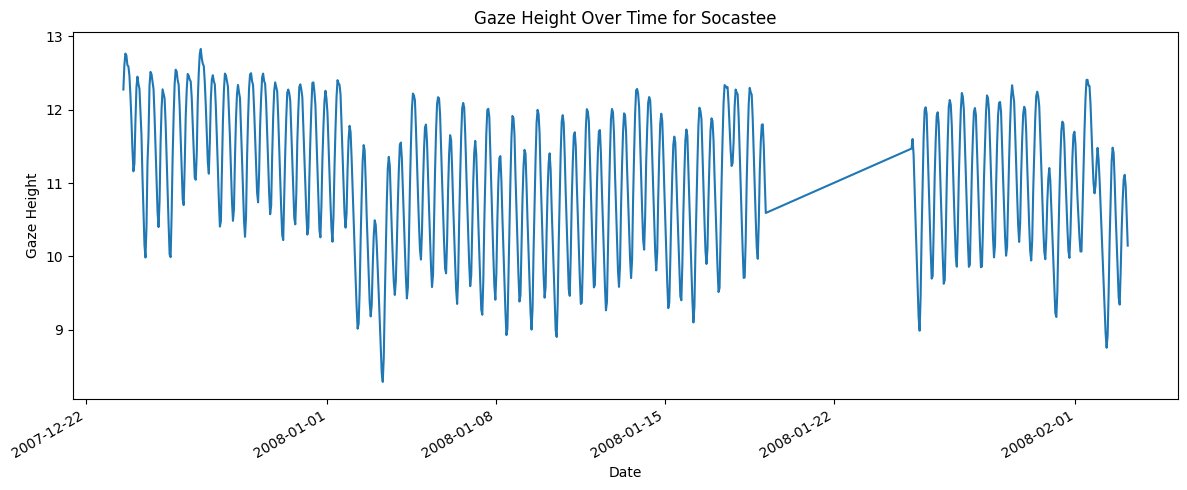

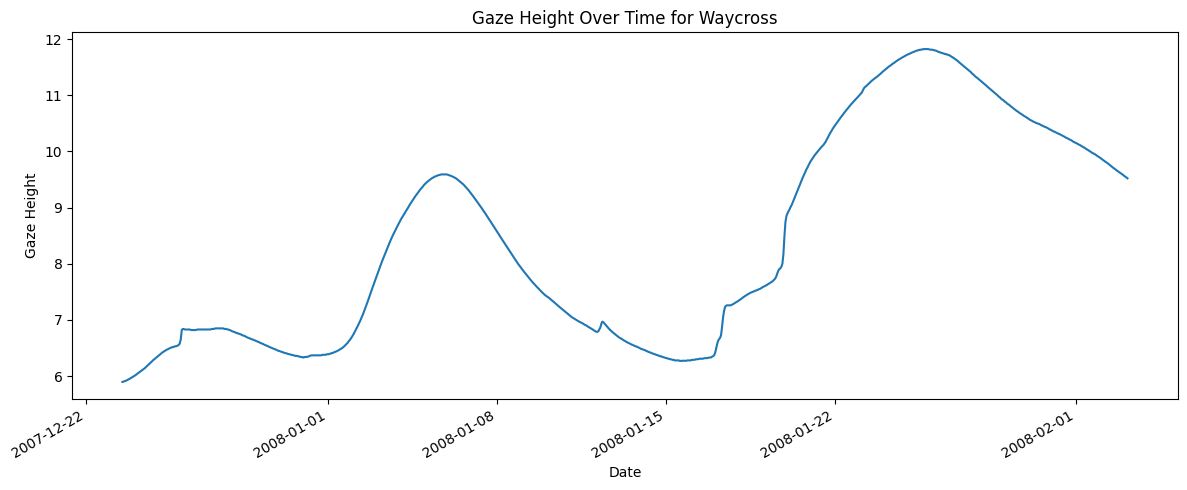

In [62]:
#plot graph
def plot_data(df, name):
    df['DATE'] = pd.to_datetime(df['DATE'], format='mixed')
    
    # Create the plot
    plt.figure(figsize=(12, 5))
    plt.plot(df['DATE'], df['gaze_height'])
    
    # Customize the plot
    plt.title(f'Gaze Height Over Time for {name}')
    plt.xlabel('Date')
    plt.ylabel('Gaze Height')
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    
    # Use tight layout to prevent the x-label from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()

plot_data(df1, 'Socastee')
#missing data between 2008-01-19 to 2008-01-25
plot_data(df2, 'Waycross')

In [4]:
way.describe()

,gaze_height
count,146679.000000
mean,8.164029
std,3.487841
min,3.725000
25%,5.140000
50%,7.185000
75%,10.787500
max,22.357500


In [18]:
soc.describe()

,gaze_height
count,146678.000000
mean,12.201074
std,1.166873
min,8.290000
25%,11.502500
50%,12.302500
75%,12.800000
max,21.822500


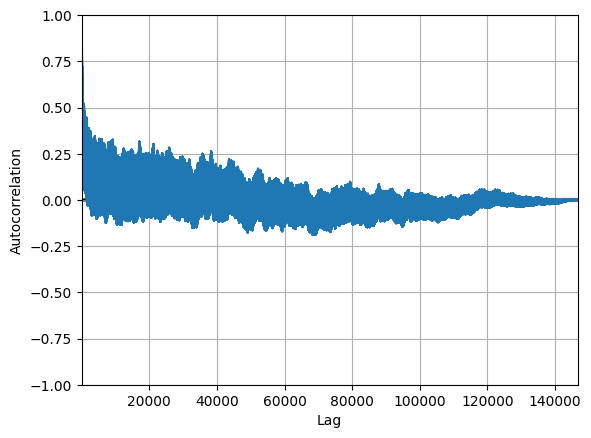

In [27]:
from pandas.plotting import autocorrelation_plot as acr_plot
acr_plot(df1['gaze_height'])
plt.show()

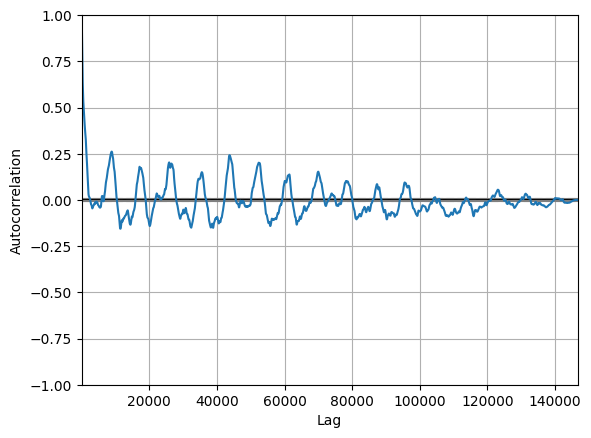

In [29]:
acr_plot(df2['gaze_height'])
plt.show()

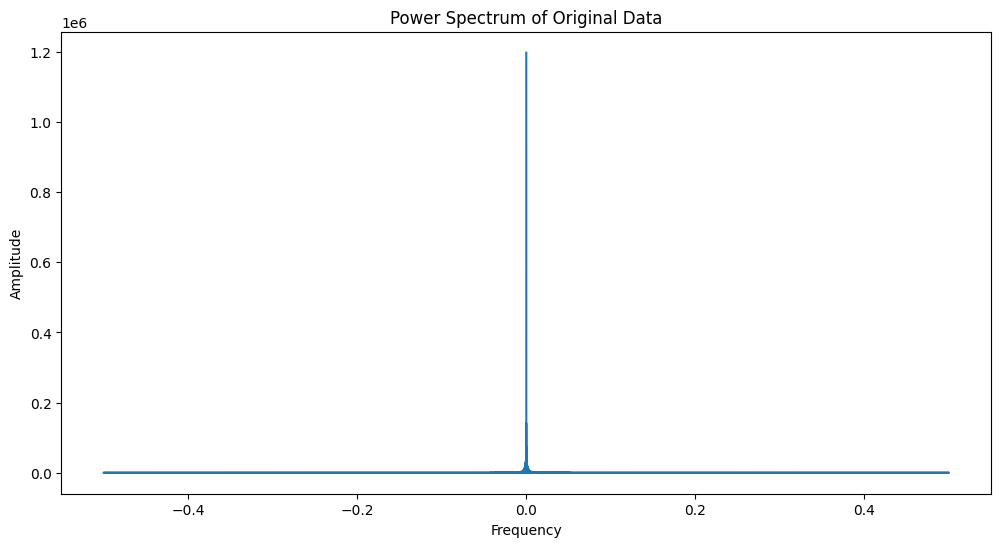

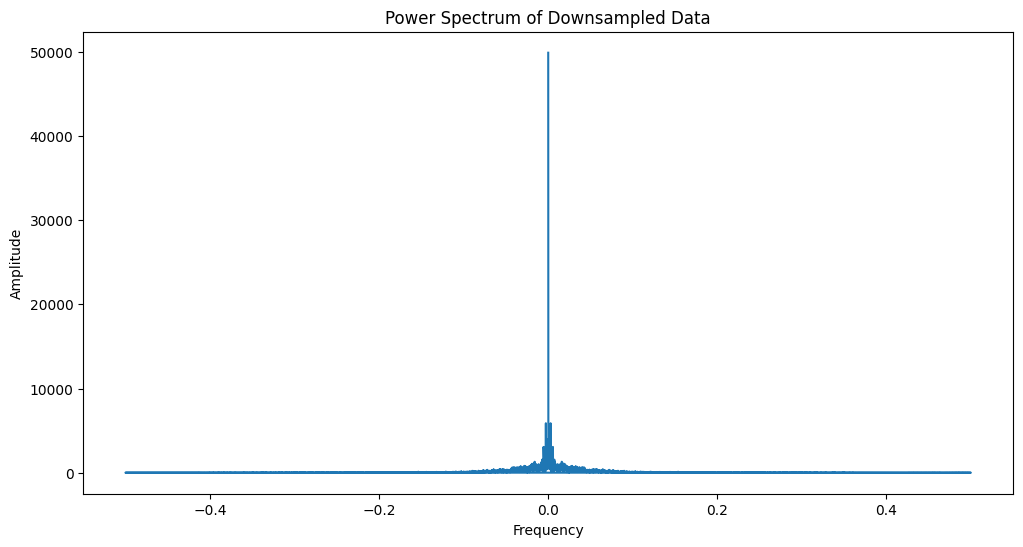

In [50]:
import numpy as np



#SOCASTEE

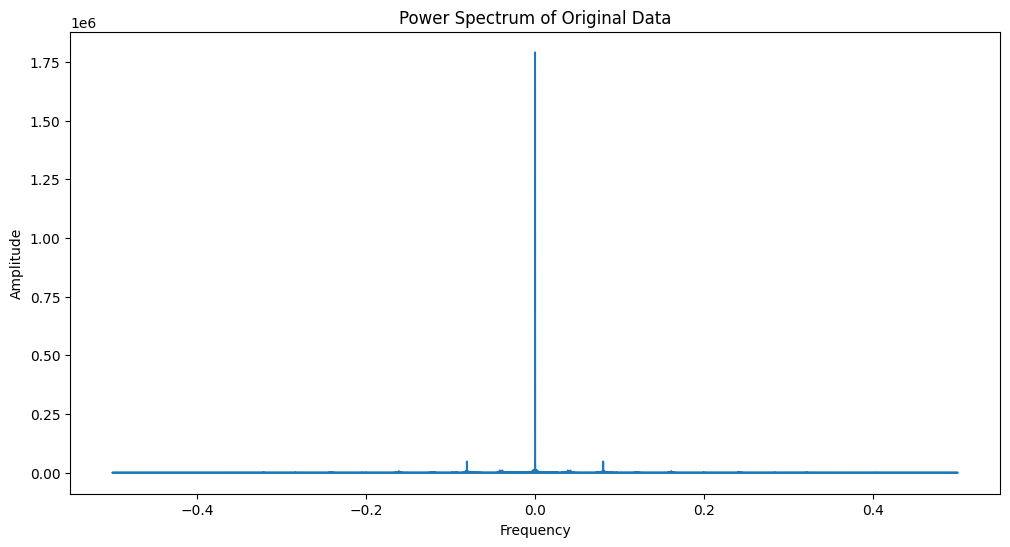

NameError: name 'df_daily' is not defined

In [34]:
import numpy as np



DatetimeIndex(['2007-10-01 04:00:00+00:00', '2007-10-01 05:00:00+00:00',
               '2007-10-01 06:00:00+00:00', '2007-10-01 07:00:00+00:00',
               '2007-10-01 08:00:00+00:00', '2007-10-01 09:00:00+00:00',
               '2007-10-01 10:00:00+00:00', '2007-10-01 11:00:00+00:00',
               '2007-10-01 12:00:00+00:00', '2007-10-01 13:00:00+00:00',
               ...
               '2024-06-24 09:00:00+00:00', '2024-06-24 10:00:00+00:00',
               '2024-06-24 11:00:00+00:00', '2024-06-24 12:00:00+00:00',
               '2024-06-24 13:00:00+00:00', '2024-06-24 14:00:00+00:00',
               '2024-06-24 15:00:00+00:00', '2024-06-24 16:00:00+00:00',
               '2024-06-24 17:00:00+00:00', '2024-06-24 18:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='DATE', length=146679, freq=None)


/local_scratch/slurm.509064/ipykernel_1819510/1540640741.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df2.resample('M').mean()


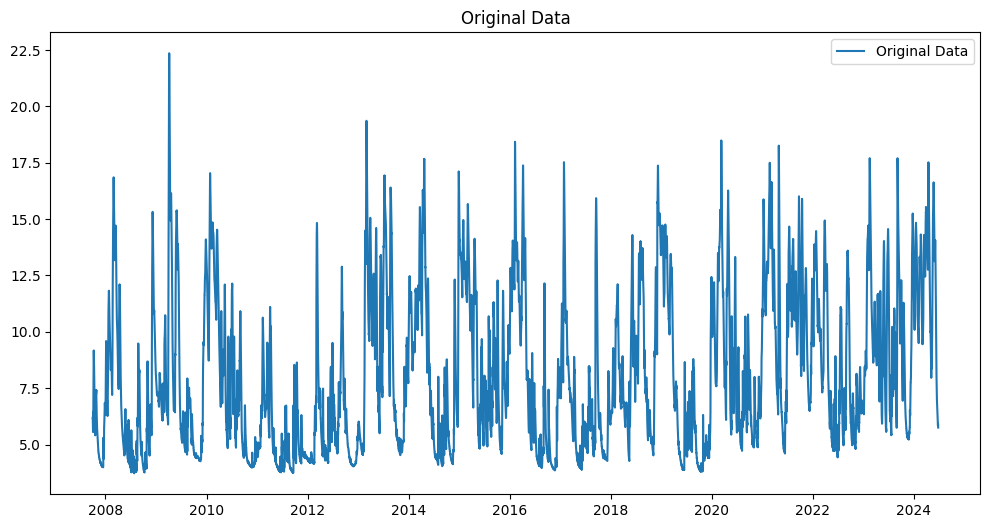

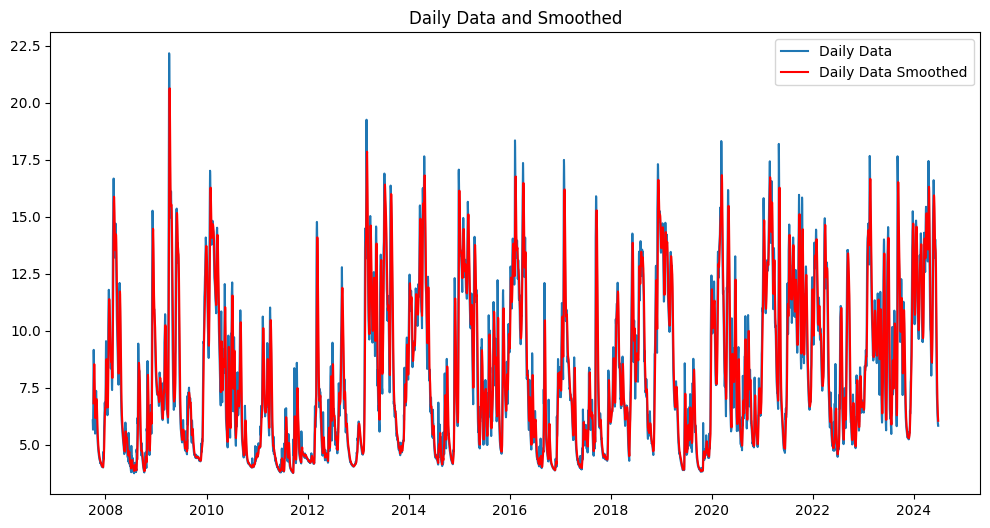

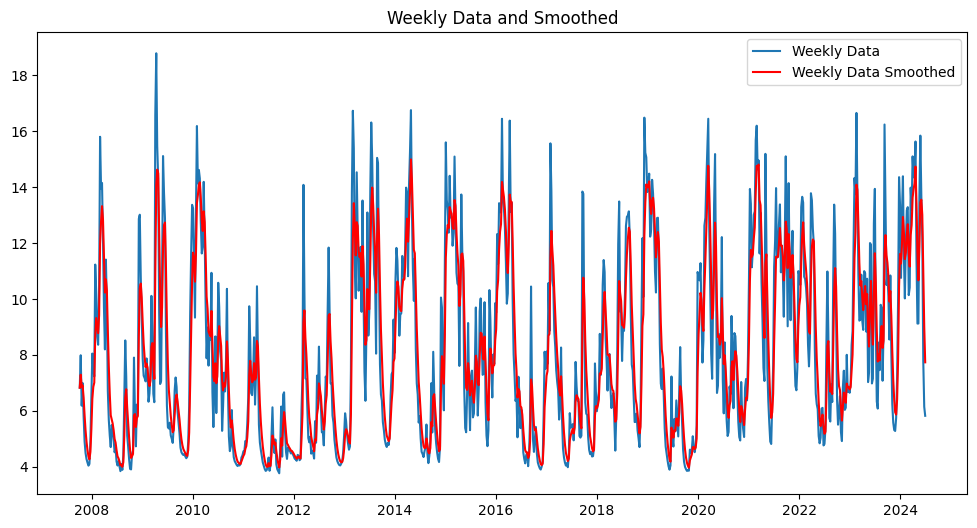

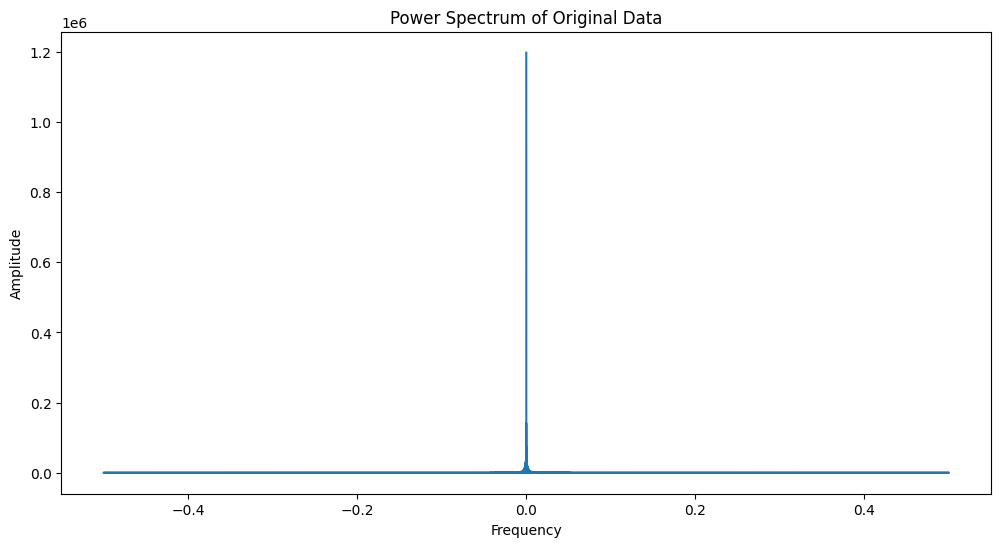

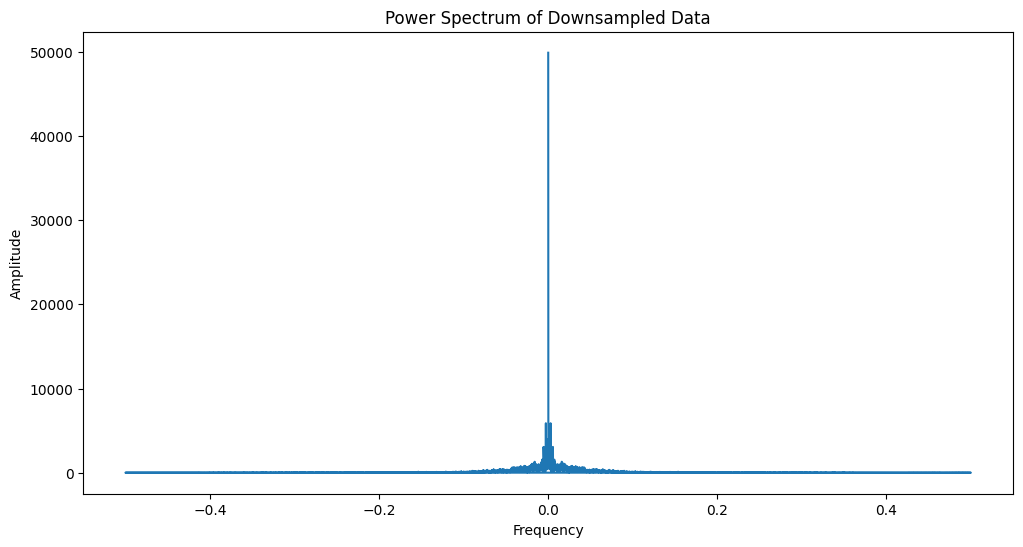

In [52]:
df2 = pd.read_csv('WAYCROSS_02226500r1h.csv')

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Set the 'date' column as the index
df2.set_index('DATE', inplace=True)

# Verify the index
print(df2.index)


df_daily = df2.resample('D').mean()

# Downsample to weekly data
df_weekly = df2.resample('W').mean()

# Downsample to monthly data
df_monthly = df2.resample('M').mean()

# Moving Average Smoothing
df_daily_smooth = df_daily.rolling(window=7).mean()  # 7-day moving average

# Exponential Moving Average Smoothing
df_weekly_smooth = df_weekly.ewm(span=4, adjust=False).mean()  # EMA with a span of 4

# Loess Smoothing (requires statsmodels)
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply Loess Smoothing on monthly data
df_monthly_smooth = lowess(df_monthly['gaze_height'], df_monthly.index, frac=0.3)

# Original data plot
plt.figure(figsize=(12, 6))
plt.plot(df2, label='Original Data')
plt.title('Original Data')
plt.legend()
plt.show()

# Daily data and smoothed plot
plt.figure(figsize=(12, 6))
plt.plot(df_daily, label='Daily Data')
plt.plot(df_daily_smooth, label='Daily Data Smoothed', color='red')
plt.title('Daily Data and Smoothed')
plt.legend()
plt.show()

# Weekly data and smoothed plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekly, label='Weekly Data')
plt.plot(df_weekly_smooth, label='Weekly Data Smoothed', color='red')
plt.title('Weekly Data and Smoothed')
plt.legend()
plt.show()


# Perform Fourier Transform on the original data
fft_original = np.fft.fft(df2['gaze_height'])
frequencies = np.fft.fftfreq(len(fft_original))

# Plot the power spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_original))
plt.title('Power Spectrum of Original Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Fourier Transform on downsampled data
fft_resampled = np.fft.fft(df_daily['gaze_height'])
frequencies_resampled = np.fft.fftfreq(len(fft_resampled))

plt.figure(figsize=(12, 6))
plt.plot(frequencies_resampled, np.abs(fft_resampled))
plt.title('Power Spectrum of Downsampled Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

DatetimeIndex(['2007-10-01 05:00:00', '2007-10-01 06:00:00',
               '2007-10-01 07:00:00', '2007-10-01 08:00:00',
               '2007-10-01 09:00:00', '2007-10-01 10:00:00',
               '2007-10-01 11:00:00', '2007-10-01 12:00:00',
               '2007-10-01 13:00:00', '2007-10-01 14:00:00',
               ...
               '2024-06-24 09:00:00', '2024-06-24 10:00:00',
               '2024-06-24 11:00:00', '2024-06-24 12:00:00',
               '2024-06-24 13:00:00', '2024-06-24 14:00:00',
               '2024-06-24 15:00:00', '2024-06-24 16:00:00',
               '2024-06-24 17:00:00', '2024-06-24 18:00:00'],
              dtype='datetime64[ns]', name='DATE', length=146678, freq=None)


/local_scratch/slurm.509064/ipykernel_1819510/1115827271.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df2.resample('M').mean()


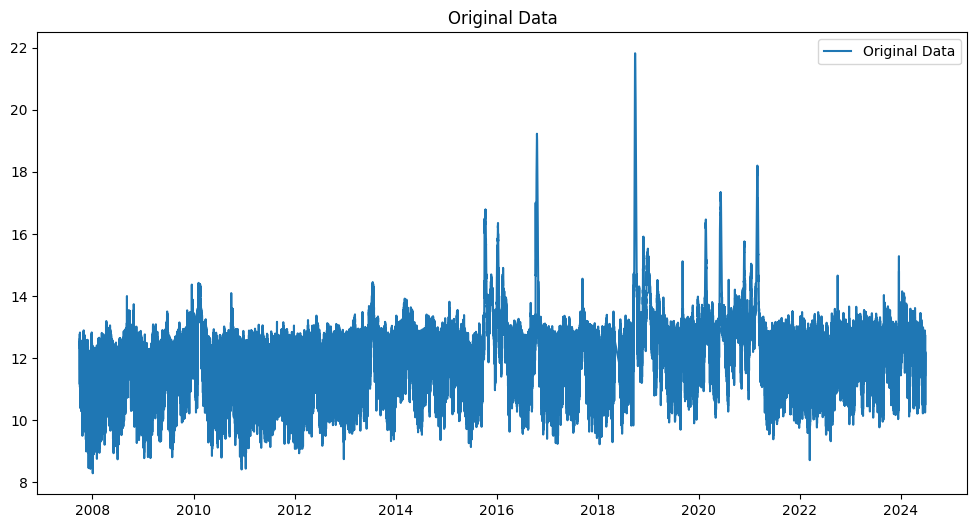

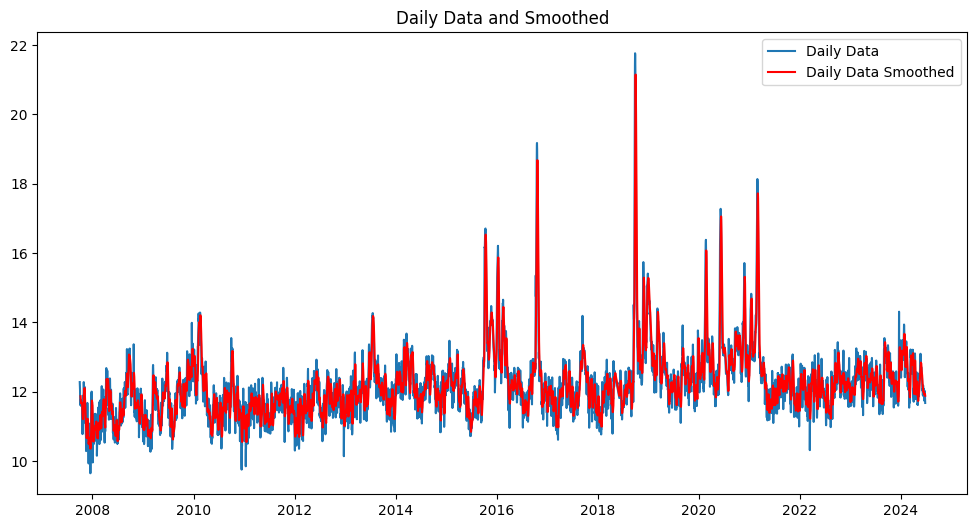

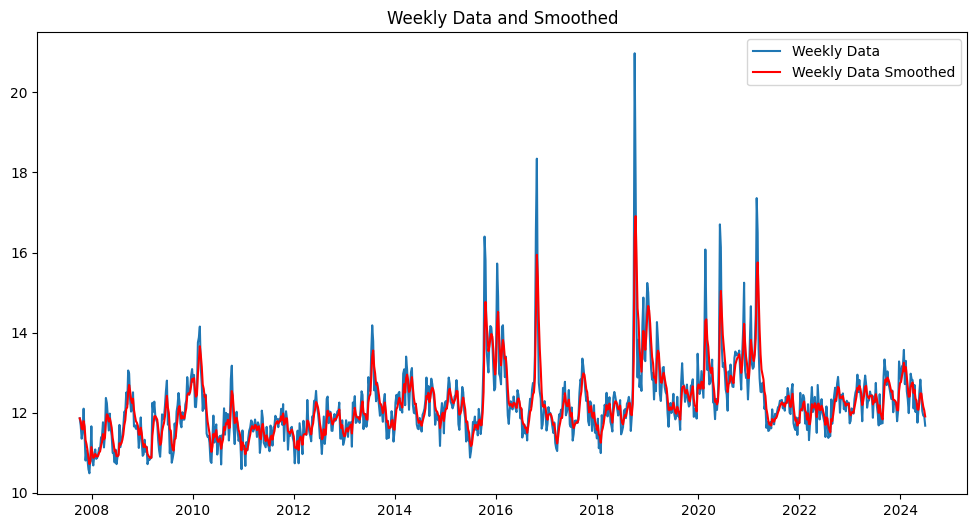

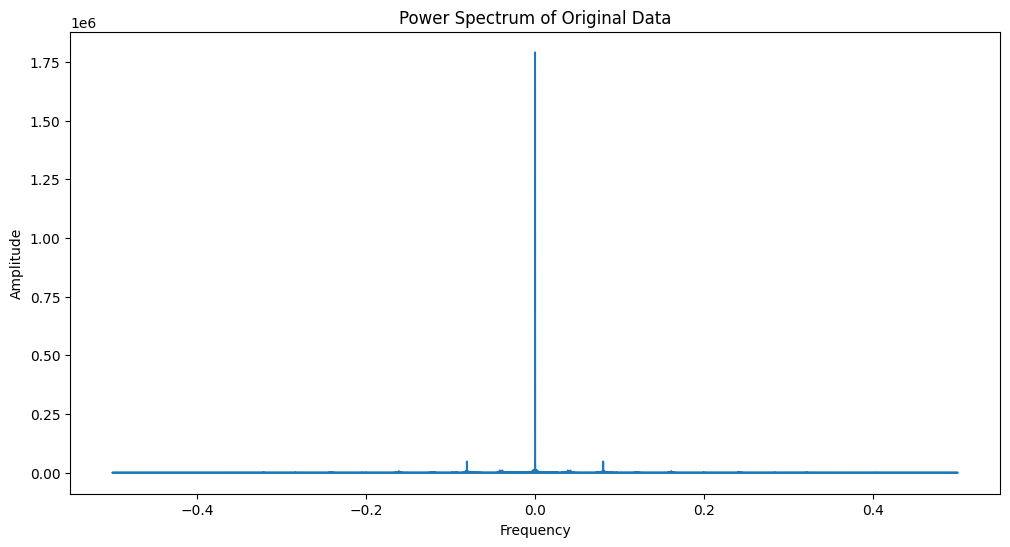

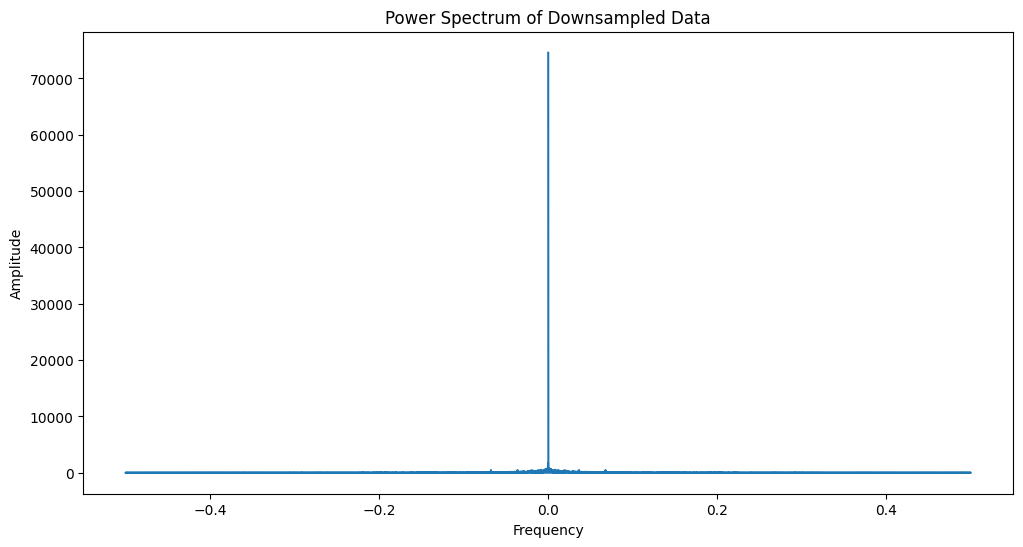

In [54]:
df2 = pd.read_csv('SOCASTEE_02110725r1h.csv')

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Set the 'date' column as the index
df2.set_index('DATE', inplace=True)

# Verify the index
print(df2.index)


df_daily = df2.resample('D').mean()

# Downsample to weekly data
df_weekly = df2.resample('W').mean()

# Downsample to monthly data
df_monthly = df2.resample('M').mean()

# Moving Average Smoothing
df_daily_smooth = df_daily.rolling(window=7).mean()  # 7-day moving average

# Exponential Moving Average Smoothing
df_weekly_smooth = df_weekly.ewm(span=4, adjust=False).mean()  # EMA with a span of 4

# Loess Smoothing (requires statsmodels)
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply Loess Smoothing on monthly data
df_monthly_smooth = lowess(df_monthly['gaze_height'], df_monthly.index, frac=0.3)

# Original data plot
plt.figure(figsize=(12, 6))
plt.plot(df2, label='Original Data')
plt.title('Original Data')
plt.legend()
plt.show()

# Daily data and smoothed plot
plt.figure(figsize=(12, 6))
plt.plot(df_daily, label='Daily Data')
plt.plot(df_daily_smooth, label='Daily Data Smoothed', color='red')
plt.title('Daily Data and Smoothed')
plt.legend()
plt.show()

# Weekly data and smoothed plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekly, label='Weekly Data')
plt.plot(df_weekly_smooth, label='Weekly Data Smoothed', color='red')
plt.title('Weekly Data and Smoothed')
plt.legend()
plt.show()

# Perform Fourier Transform on the original data
fft_original = np.fft.fft(df1['gaze_height'])
frequencies = np.fft.fftfreq(len(fft_original))

# Plot the power spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_original))
plt.title('Power Spectrum of Original Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Fourier Transform on downsampled data
fft_resampled = np.fft.fft(df_daily['gaze_height'])
frequencies_resampled = np.fft.fftfreq(len(fft_resampled))

plt.figure(figsize=(12, 6))
plt.plot(frequencies_resampled, np.abs(fft_resampled))
plt.title('Power Spectrum of Downsampled Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
